In [1]:
import numpy as np
from matplotlib import pyplot as plt

from semester6.ode import Ode, solve_galerkin, solve_fdm, solve_collocation
from math import log
from scipy import special

In [2]:
ode1 = Ode(
    p=lambda x: 1 / (x + 3),
    q=lambda x: -x,
    r=lambda x: log(2 + x),
    f=lambda x: 1 - x / 2,
    a=-1,
    b=1,
    alpha1=0,
    alpha2=-1,
    alpha=0,
    beta1=1 / 2,
    beta2=1,
    beta=0,
)


def w_i1(i: int):
    return lambda x: (1 - x ** 2) ** 2 * special.eval_jacobi(i - 2, 2, 2, x)


def w_prime_i1(i: int):
    return lambda x: -2 * (i - 1) * (1 - x ** 2) * special.eval_jacobi(i - 1, 1, 1, x)


def w_prime_prime_i1(i: int):
    return lambda x: 4 * (i - 1) * i * special.eval_jacobi(i, 0, 0, x)


n = 64
omegas1 = [(w_i1(i), w_prime_i1(i), w_prime_prime_i1(i)) for i in range(2, n+1)]
omegas1.insert(0, (lambda x: x ** 3 - 3 * x + 2, lambda x: 3 * x ** 2 - 3, lambda x: 6 * x))
omegas1.insert(0, (lambda x: x ** 2 + 2 * x - 11, lambda x: 2 * x + 2, lambda x: 2))

space = np.linspace(-1, 1, 100)

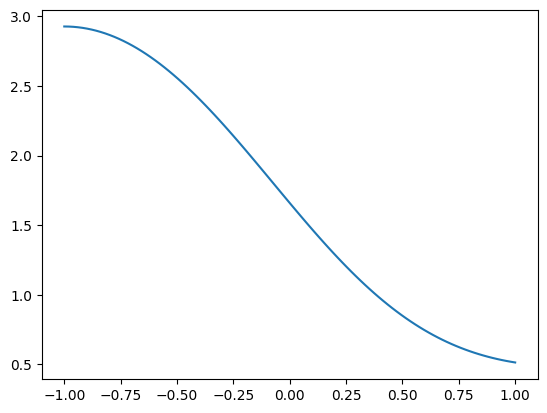

In [3]:
u1 = solve_galerkin(ode1, n, omegas1)

f = u1(space)
plt.plot(space, f)
plt.show()

In [4]:
us1 = [solve_galerkin(ode1, i, omegas1[:i+1]) for i in [2, 4, 8, 16, 32, 64]]

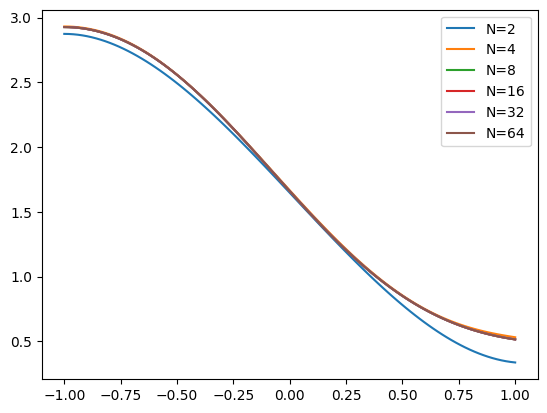

In [5]:
fs1 = [u(space) for u in us1]
plots = [plt.plot(space, f, label=f"N={2**(i+1)}")[0] for i, f in enumerate(fs1)]
plt.legend(handles=plots, loc="best")
plt.show()

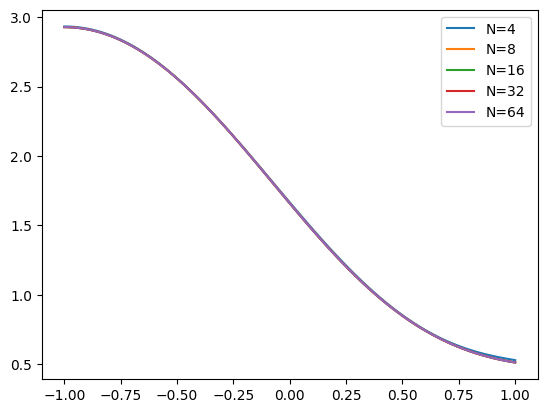

In [6]:
plots_ = [plt.plot(space, f, label=f"N={2**(i+2)}")[0] for i, f in enumerate(fs1[1:])]
plt.legend(handles=plots_, loc="best")
plt.show()

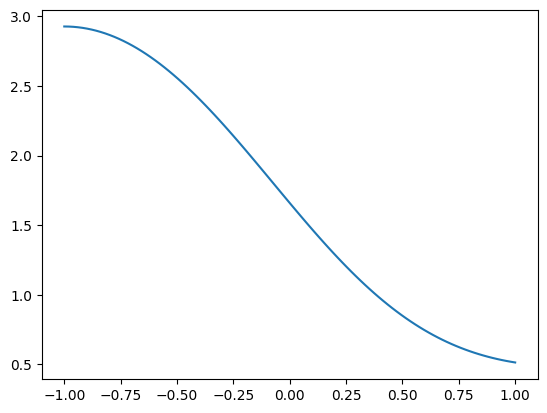

In [7]:
n = 64
roots1 = [-np.cos((2 * i +1) / (2*n) * np.pi) for i in range(n)]
u_collocation = solve_collocation(ode1, roots1, n, omegas1[:n+1])
f2 = u_collocation(space)
plt.plot(space, f2)
plt.show()

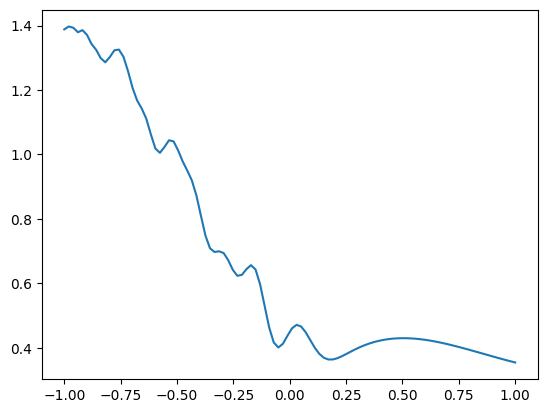

In [18]:
roots2 = [np.cos((2 * i +1) / (2*n)) for i in range(n)]
u_collocation1 = solve_collocation(ode1, roots2, n, omegas1[:n+1])
f3 = u_collocation1(space)
plt.plot(space, f3)
plt.show()

In [9]:
u1_fdm = solve_fdm(ode1, 32, 10e-8)

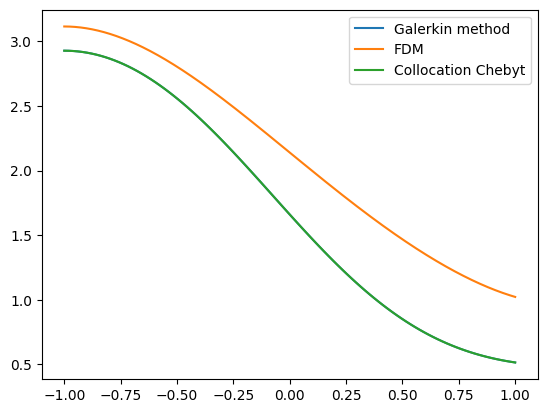

In [15]:
(galerkin, ) = plt.plot(space, f, label="Galerkin method")
(fdm, ) = plt.plot(u1_fdm[0], u1_fdm[1], label="FDM")
(colloc_chebyt, ) = plt.plot(space, f2, label="Collocation Chebyt")
# (colloc_equal, ) = plt.plot(space, f3, label = "Collocation Equal")
plt.legend(handles=[galerkin, fdm, colloc_chebyt], loc="best")
plt.show()